In [1]:
import numpy as np
import non_backtracking_tools as nbt
import networkx as nx
import numpy.linalg as la
import scipy.linalg as scila
import nb_pagerank as nbpr
from matplotlib import pyplot as plt

### Create graph and adjacency matrix

In [2]:
# Create graph
G = nx.random_partition_graph([50,50],0.25,.05)
F = list(nx.connected_component_subgraphs(G))
G = F[0]

In [3]:
# Small example
G = nx.DiGraph()
G.add_edges_from([[0,1],[0,4],[1,3],[2,3],[2,4],[3,4]])

In [4]:
# Get standard adjacency matrix
A = nx.adjacency_matrix(G).todense()
print(f'A: {A}')
# Get rid of sinks
A[2,:] = 1
print(f'A: {A}')

A: [[0 1 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 1 0]]
A: [[0 1 1 0 0]
 [0 0 0 1 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 1 0]]


In [5]:
# Create new G with new A
G = nx.DiGraph(A)

In [6]:
A = nx.adjacency_matrix(G).todense()
A

matrix([[0, 1, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 1, 0]], dtype=int64)

### Define functions for s, t, f, and p

In [7]:
# Create T and S matrices
def create_s_t(G):
    # Initialize matrices
    T = np.zeros((len(G.edges),len(G.nodes)))
    S = np.zeros((len(G.edges),len(G.nodes)))
    # Fill in matrix
    edges = []
    for i,e in enumerate(G.edges):
        edges.append(e)
        # Add 1 if connected
        S[i,e[0]] = 1
        T[i,e[1]] = 1
    return S, T, edges

In [8]:
# Define F
def create_f(s,t,G):
    N = len(G.nodes)
    # Define pi
#     print(N)
    pi = (T@(scila.pinv(T.T@T))@np.ones(T.shape[1])).reshape(len(G.edges),1)

    return 1/N*np.ones(pi.shape[0]).reshape(pi.shape[0],1)@pi.T



In [9]:
# Define P matrix
def P(W,F,D,alpha=.85):
    # Find inverse of D
    try:
        D_inv = la.solve(D,np.eye(D.shape[0]))
    # Check for invertibility
    except la.LinAlgError as err:
        raise la.LinAlgError('D is not invertible')
    return alpha*D_inv@W+(1-alpha)*F

### Solve for P

In [10]:
# Get S and T
S, T, edges = create_s_t(G)
print(f'Edges: {edges}\nS: {S}\nT: {T}')
# Create W matrix
W = T@S.T

# Get rid of sinks
# W[W.sum(axis=1)==0] = 1
# W.sum(axis=1)==0
print(f'W: {W}')

Edges: [(0, 1), (0, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 2), (4, 2), (4, 3)]
S: [[ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.]]
T: [[ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]]
W: [[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.]
 [ 0.  0.  

In [11]:
F = create_f(S,T,G)
F

array([[ 0.1       ,  0.05      ,  0.06666667,  0.2       ,  0.1       ,
         0.05      ,  0.06666667,  0.2       ,  0.05      ,  0.05      ,
         0.06666667],
       [ 0.1       ,  0.05      ,  0.06666667,  0.2       ,  0.1       ,
         0.05      ,  0.06666667,  0.2       ,  0.05      ,  0.05      ,
         0.06666667],
       [ 0.1       ,  0.05      ,  0.06666667,  0.2       ,  0.1       ,
         0.05      ,  0.06666667,  0.2       ,  0.05      ,  0.05      ,
         0.06666667],
       [ 0.1       ,  0.05      ,  0.06666667,  0.2       ,  0.1       ,
         0.05      ,  0.06666667,  0.2       ,  0.05      ,  0.05      ,
         0.06666667],
       [ 0.1       ,  0.05      ,  0.06666667,  0.2       ,  0.1       ,
         0.05      ,  0.06666667,  0.2       ,  0.05      ,  0.05      ,
         0.06666667],
       [ 0.1       ,  0.05      ,  0.06666667,  0.2       ,  0.1       ,
         0.05      ,  0.06666667,  0.2       ,  0.05      ,  0.05      ,
         0.066

In [12]:
# Create D
D = np.diag(W.sum(axis=1))

In [13]:
p = P(W,F,D)

### Check claimed properties to ensure validity of functions

In [14]:
# Check W1 > 0
W.sum(axis=1)[W.sum(axis=1)<=0]

array([], dtype=float64)

In [15]:
# Check positivity of pi
pi = (T@(scila.pinv(T.T@T))@np.ones(T.shape[1])).reshape(len(G.edges),1)
pi[pi <= 0]

array([], dtype=float64)

In [16]:
# Check norm of pi
print(la.norm(pi,ord=1),len(G.nodes))

5.0 5


In [17]:
# Check F1 = 1
F.sum(axis=1)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [18]:
# Check (D_inv@W).sum(axis=1)
D_inv = la.solve(D,np.eye(D.shape[0]))
(D_inv@W).sum(axis=1)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [19]:
# Check lemma 3.1
D_og = np.diag(np.array(A.sum(axis=1)).T[0])
np.allclose(D_inv@T@D_og,T)

True

In [20]:
np.allclose(S.T@D_inv@T,S.T@T@la.solve(D_og,np.eye(D_og.shape[0])))

True

### Find pagerank vector

In [21]:
# Use Corrollary 3.6
pr_edge = la.solve(np.eye(W.T.shape[0])-.85*W.T@D_inv,((1-.85)/len(G.nodes)*S@la.solve(D_og,np.eye(D_og.shape[1]))).sum(axis=1))

In [22]:
# Convert to vertices
pr_vector = S.T@pr_edge

In [23]:
# Check if vector is the same
np.allclose(pr_vector,np.array(list(nx.pagerank(G).values())))
print(np.array(list(nx.pagerank(G).values())))

[ 0.09850217  0.14036545  0.40295414  0.25967607  0.09850217]


# Non-backtracking method from paper

### Create $v^T$

In [24]:
# Understand what v^T is
build_v = lambda S, D_og: (S@la.solve(D_og,np.eye(D_og.shape[0]))@np.ones(D_og.shape[1]))
v = build_v(S,D_og)
print(f"S: {S}")
print(f"$v^T$: {v.T}")

S: [[ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.]]
$v^T$: [ 0.5  0.5  1.   0.2  0.2  0.2  0.2  0.2  1.   0.5  0.5]


### Build B

In [25]:
def build_B(W):
    B = W - np.multiply(W,W.T)
    # Replace all rows with 0
#     B[B.sum(axis=1)==0] = v.T
    return B
B = build_B(W)
print(f"B: {B}")

B: [[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  1.  1.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]


### Create new $F$

In [26]:
nb_F = lambda v,n: 1/n*np.ones((v.shape[0],1))@v.T.reshape((1,v.shape[0]))

In [27]:
F_scr = nb_F(v,len(G.nodes))
print(f"F: {F_scr}")
print(f"v.T: {v.T}")

F: [[ 0.1   0.1   0.2   0.04  0.04  0.04  0.04  0.04  0.2   0.1   0.1 ]
 [ 0.1   0.1   0.2   0.04  0.04  0.04  0.04  0.04  0.2   0.1   0.1 ]
 [ 0.1   0.1   0.2   0.04  0.04  0.04  0.04  0.04  0.2   0.1   0.1 ]
 [ 0.1   0.1   0.2   0.04  0.04  0.04  0.04  0.04  0.2   0.1   0.1 ]
 [ 0.1   0.1   0.2   0.04  0.04  0.04  0.04  0.04  0.2   0.1   0.1 ]
 [ 0.1   0.1   0.2   0.04  0.04  0.04  0.04  0.04  0.2   0.1   0.1 ]
 [ 0.1   0.1   0.2   0.04  0.04  0.04  0.04  0.04  0.2   0.1   0.1 ]
 [ 0.1   0.1   0.2   0.04  0.04  0.04  0.04  0.04  0.2   0.1   0.1 ]
 [ 0.1   0.1   0.2   0.04  0.04  0.04  0.04  0.04  0.2   0.1   0.1 ]
 [ 0.1   0.1   0.2   0.04  0.04  0.04  0.04  0.04  0.2   0.1   0.1 ]
 [ 0.1   0.1   0.2   0.04  0.04  0.04  0.04  0.04  0.2   0.1   0.1 ]]
v.T: [ 0.5  0.5  1.   0.2  0.2  0.2  0.2  0.2  1.   0.5  0.5]


### Create $\mathscr{P}$

In [28]:
def nb_trans(B,F,D,alpha=.85):
    return alpha*la.solve(D,np.eye(D.shape[0]))@B+(1-alpha)*F

In [29]:
P_nb = nb_trans(B,F_scr,D)
print(f"P_nb: {P_nb}")

P_nb: [[ 0.015  0.015  0.88   0.006  0.006  0.006  0.006  0.006  0.03   0.015
   0.015]
 [ 0.015  0.015  0.03   0.006  0.176  0.176  0.176  0.176  0.03   0.015
   0.015]
 [ 0.015  0.015  0.03   0.006  0.006  0.006  0.006  0.006  0.88   0.015
   0.015]
 [ 0.44   0.015  0.03   0.006  0.006  0.006  0.006  0.006  0.03   0.015
   0.015]
 [ 0.015  0.015  0.88   0.006  0.006  0.006  0.006  0.006  0.03   0.015
   0.015]
 [ 0.015  0.015  0.03   0.176  0.176  0.006  0.176  0.176  0.03   0.015
   0.015]
 [ 0.015  0.015  0.03   0.006  0.006  0.006  0.006  0.006  0.03   0.015
   0.015]
 [ 0.015  0.015  0.03   0.006  0.006  0.006  0.006  0.006  0.03   0.015
   0.44 ]
 [ 0.015  0.015  0.03   0.176  0.176  0.176  0.006  0.176  0.03   0.015
   0.015]
 [ 0.015  0.015  0.03   0.176  0.176  0.176  0.176  0.006  0.03   0.015
   0.015]
 [ 0.015  0.015  0.03   0.006  0.006  0.006  0.006  0.006  0.88   0.015
   0.015]]


### Find Non-backtracking PageRank vector

In [30]:
# Solve for PageRank vector
def pr_tilde(B,D,v,n,alpha=.85):
    return la.solve(np.eye(B.shape[1])-alpha*
                    B.T@la.solve(D,np.eye(D.shape[0])),(1-alpha)/n
                   *v)

In [31]:
pr_nb = pr_tilde(B,D,v,len(G.nodes))

In [32]:
# Convert to standard space
pr_nb_vecc = S.T@pr_nb

In [33]:
print(f"Nonbacktracking: {pr_nb_vecc}\nStandard: {np.array(list(nx.pagerank(G).values()))}")

Nonbacktracking: [ 0.04558949  0.08934755  0.16292462  0.13194649  0.04558949]
Standard: [ 0.09850217  0.14036545  0.40295414  0.25967607  0.09850217]


In [34]:
print(f"NonBacktracking: {pr_nb_vecc.argsort()[::-1]}\nStandard: {np.array(list(nx.pagerank(G).values())).argsort()[::-1]}")

NonBacktracking: [2 3 1 4 0]
Standard: [2 3 1 4 0]


In [35]:
print(f'A: {nx.adjacency_matrix(G).todense()}')

A: [[0 1 1 0 0]
 [0 0 0 1 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 1 0]]


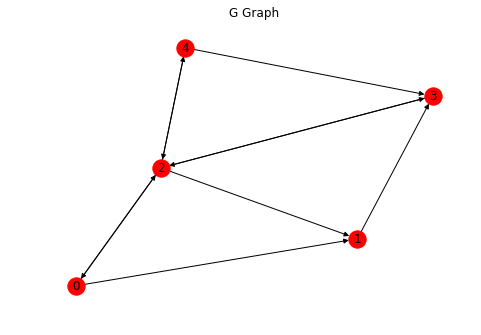

[(0, 3), (1, 3), (2, 9), (3, 4), (4, 3)]


In [53]:
# Draw graph
# Plot B graph
nx.draw(G,pos=nx.spring_layout(G),with_labels=True)
plt.draw()
plt.title('G Graph')
plt.show()
print(G.degree)

In [76]:
# Create megafunction
def nb_pagerank(G,alpha=.85):
    """Finds nonbacktracking pagerank of a graph G"""
    # Find S and T
    S, T, edges = create_s_t(G)
    # Find W
    W = T@S.T
    # Find B
    B = build_B(W)
    # Find D
    A = nx.convert_matrix.to_numpy_matrix(G)
    print((A@np.ones((A.shape[1],1))))
    D = np.diag((A@np.ones((A.shape[1],1))).T)
    print(D)
    # Find v
    v = build_v(S,D)
    print(v)
    # Build F
    F = nb_F(v,len(G.nodes))
    # Find D for W
    Dw = np.diag(W.sum(axis=1))
    # Find pagerank vector
    return pr_tilde(B,Dw,v,len(G.nodes),alpha)
    D = np.diag(W.sum(axis=1))

In [77]:
print(f"Long: {pr_nb}\nBig: {nb_pagerank(G)}")
print(D_og)

[[ 2.]
 [ 1.]
 [ 5.]
 [ 1.]
 [ 2.]]
[ 2.]


LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

## Run with bigger example

In [39]:
# Create graph
G_big = nx.random_partition_graph([50,50],0.25,.05)
F = list(nx.connected_component_subgraphs(G_big))
G_big = F[0]

In [40]:
# Get standard pagerank
st_big = np.array(list(nx.pagerank(G).values()))

In [41]:
# Get nonbacktracking pagerank
S_big, T_big, edges_big = create_s_t(G_big)
W_big = T_big@S_big.T
B_big = build_B(W_big)
F_big = nb_F()

TypeError: <lambda>() missing 2 required positional arguments: 'v' and 'n'

### Run model with our code

In [ ]:
# Make little s
s = [0 for v in G.nodes()]
s[0] = 1

In [ ]:
p2 = nbpr.pr_tilde(G,s,.85)

In [ ]:
p2

In [ ]:
pr_nb

# Compare to our code

# Look at nonbacktracking vs backtracking pagerank